<a href="https://colab.research.google.com/github/nancy-singh10/Crop-weed-Detection/blob/main/project_AGRICULTURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required dependencies
!pip install roboflow
!pip install yolov5
!pip install tensorboard
from roboflow import Roboflow

# Initialize Roboflow API with your API key
rf = Roboflow(api_key="cXvZkil8XKJJ2YnncdxY")

# Select your project and dataset version
project = rf.workspace("nancy-singh-gwwkw").project("weed-detection-q14gi")
version = project.version(1)  # Version 1 of the dataset

# Download the dataset in YOLOv5 format
dataset = version.download("yolov5")
from roboflow import Roboflow

# Initialize Roboflow API with your API key
rf = Roboflow(api_key="cXvZkil8XKJJ2YnncdxY")

# Select your project and dataset version
project = rf.workspace("nancy-singh-gwwkw").project("weed-detection-q14gi")
version = project.version(1)  # Version 1 of the dataset

# Download the dataset in YOLOv5 format
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import torch
from roboflow import Roboflow
import matplotlib.pyplot as plt
import cv2


In [ ]:

!pip install inference-sdk


In [ ]:
from inference_sdk import InferenceHTTPClient
!pip install matplotlib opencv-python


In [ ]:
# Initialize the InferenceHTTPClient with your API URL and API Key
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="cXvZkil8XKJJ2YnncdxY"
)

# Specify the image path (replace 'your_image.jpg' with your actual image file path)
image_path = "/content/IMG_6108_JPG.rf.fe12cca7d950b973bd526742a03d4beb.jpg"  # Make sure to use the correct path

# Run inference
result = CLIENT.infer(image_path, model_id="weed-detection-q14gi/1")

# Directly print the result (since it's already a dictionary)
print(result)



{'inference_id': 'c64fc570-71c4-4ce3-9340-a0a0503f8345', 'time': 0.03433895000125631, 'image': {'width': 640, 'height': 480}, 'predictions': [{'x': 176.5, 'y': 202.5, 'width': 81.0, 'height': 101.0, 'confidence': 0.9621174931526184, 'class': 'crop', 'class_id': 0, 'detection_id': 'c765d9b0-7903-4519-9d72-32034559d862'}, {'x': 50.0, 'y': 228.5, 'width': 64.0, 'height': 85.0, 'confidence': 0.9206329584121704, 'class': 'crop', 'class_id': 0, 'detection_id': '39719e18-3c00-4782-81ae-982fe39b69f3'}, {'x': 388.5, 'y': 260.0, 'width': 111.0, 'height': 72.0, 'confidence': 0.9132765531539917, 'class': 'crop', 'class_id': 0, 'detection_id': '52047d8d-b0c4-4c7c-b9c3-f24f2e8a12be'}, {'x': 507.0, 'y': 221.0, 'width': 116.0, 'height': 42.0, 'confidence': 0.9086071252822876, 'class': 'crop', 'class_id': 0, 'detection_id': 'ab7367e5-ec48-4666-af01-2b531cff342a'}, {'x': 180.0, 'y': 288.5, 'width': 70.0, 'height': 27.0, 'confidence': 0.857107400894165, 'class': 'weed', 'class_id': 1, 'detection_id': 'a1

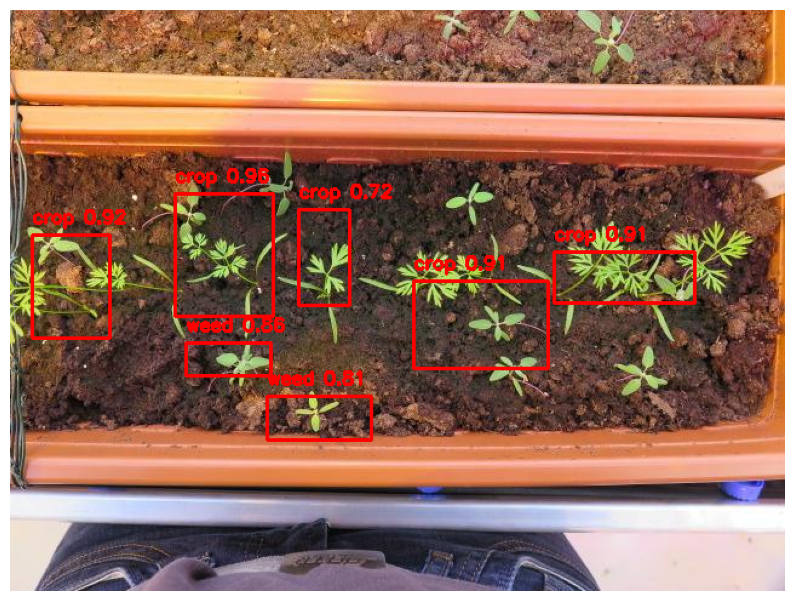

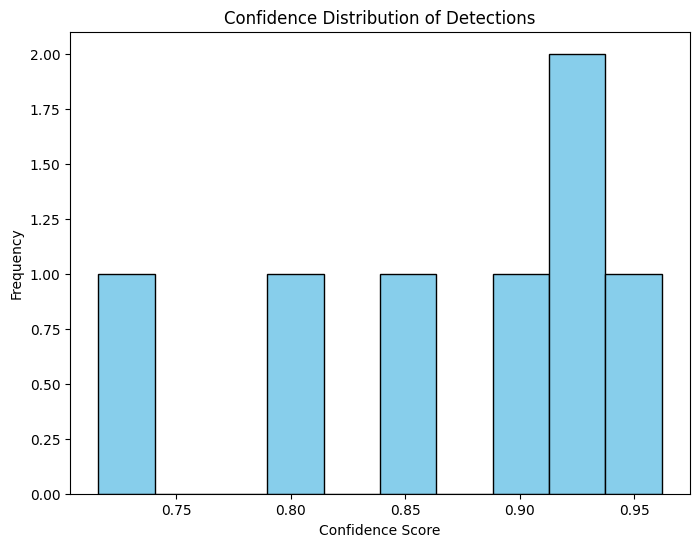

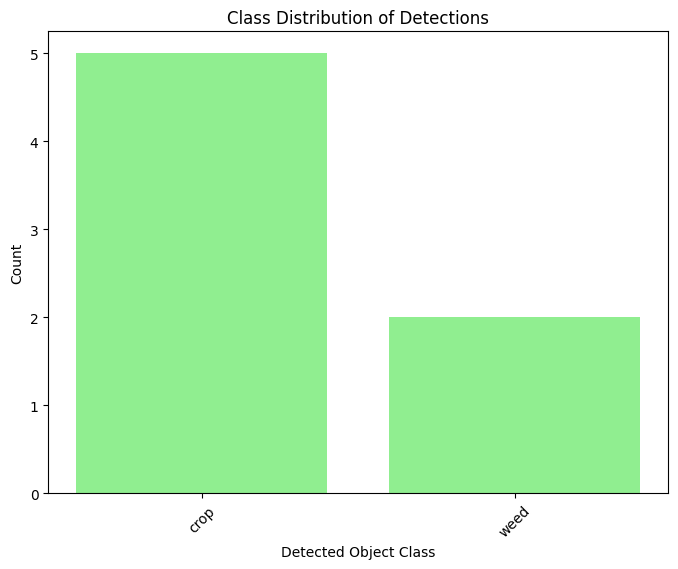

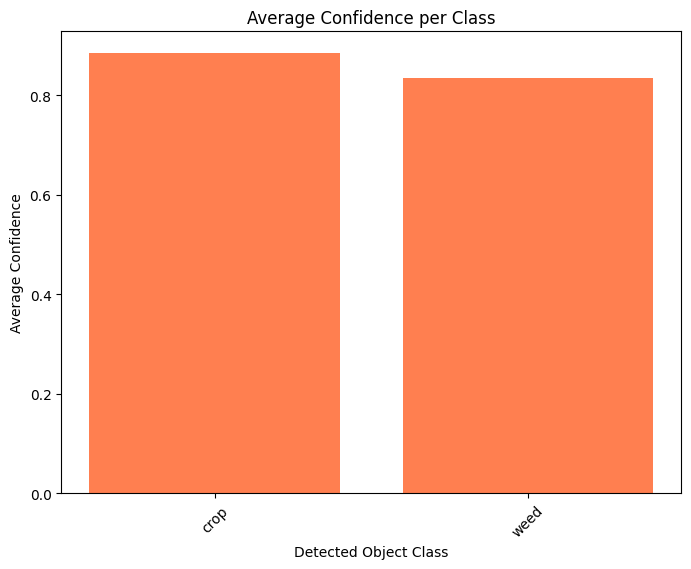

In [ ]:
import cv2
import matplotlib.pyplot as plt
from inference_sdk import InferenceHTTPClient
import numpy as np

# Initialize the InferenceHTTPClient with your API URL and API Key
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="cXvZkil8XKJJ2YnncdxY"
)

# Specify the image path (replace 'your_image.jpg' with your actual image file path)
image_path = "/content/IMG_6108_JPG.rf.fe12cca7d950b973bd526742a03d4beb.jpg"

# Run inference
result = CLIENT.infer(image_path, model_id="weed-detection-q14gi/1")

# Process the result (the result is a dictionary)
predictions = result["predictions"]

# Load the image using OpenCV
img = cv2.imread(image_path)

# Convert the image from BGR (OpenCV format) to RGB (for matplotlib display)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes and labels
for prediction in predictions:
    label = prediction["class"]  # Adjusted field name for the class
    confidence = prediction["confidence"]
    x = prediction["x"]
    y = prediction["y"]
    width = prediction["width"]
    height = prediction["height"]

    # Calculate bounding box coordinates (converting from center-width-height format to top-left-bottom-right)
    x1 = int(x - width / 2)
    y1 = int(y - height / 2)
    x2 = int(x + width / 2)
    y2 = int(y + height / 2)

    # Draw the bounding box and label on the image
    color = (255, 0, 0)  # Red color for bounding box (you can change this)
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color, 2)
    label_text = f"{label} {confidence:.2f}"
    cv2.putText(img_rgb, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the image with bounding boxes using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Create a graph showing the confidence distribution (Histogram)
confidence_scores = [prediction["confidence"] for prediction in predictions]

plt.figure(figsize=(8, 6))
plt.hist(confidence_scores, bins=10, color='skyblue', edgecolor='black')
plt.title("Confidence Distribution of Detections")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.show()

# Create a graph showing the class distribution (Bar chart)
label_counts = {}
for prediction in predictions:
    label = prediction["class"]
    label_counts[label] = label_counts.get(label, 0) + 1

labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='lightgreen')
plt.title("Class Distribution of Detections")
plt.xlabel("Detected Object Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Create a graph showing the average confidence per class (Bar chart)
average_confidence = {}
for prediction in predictions:
    label = prediction["class"]
    confidence = prediction["confidence"]
    if label in average_confidence:
        average_confidence[label].append(confidence)
    else:
        average_confidence[label] = [confidence]

# Calculate average confidence for each class
avg_confidence_per_class = {label: np.mean(confidences) for label, confidences in average_confidence.items()}

# Plotting the average confidence
avg_labels = list(avg_confidence_per_class.keys())
avg_confidence_values = list(avg_confidence_per_class.values())

plt.figure(figsize=(8, 6))
plt.bar(avg_labels, avg_confidence_values, color='coral')
plt.title("Average Confidence per Class")
plt.xlabel("Detected Object Class")
plt.ylabel("Average Confidence")
plt.xticks(rotation=45)
plt.show()
